In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import statistics as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Exploração dos Dados

In [ ]:
# 1. Dados categóricos
group = df_train.groupby(['Sex']).size()
group
df_train.Sex.value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Exploração dos dados
# 2. Colunas Númericas
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\bruno.mendes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age')

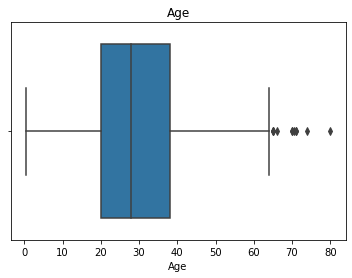

In [ ]:
# 3. visualizando distribuição com boxplot
sn.boxplot(df_train['Age']).set_title('Age')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

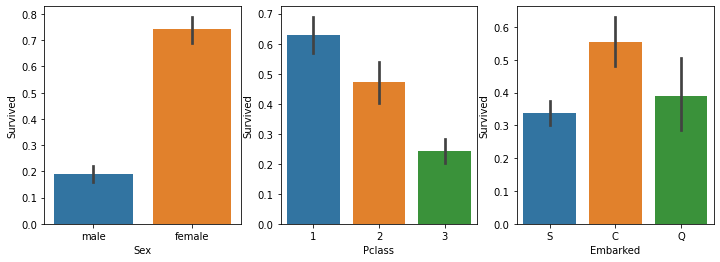

In [ ]:
# 4. Plotando gráficos para Survive vs Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sn.barplot(x='Sex', y='Survived', data=df_train, ax=axis1)
sn.barplot(x='Pclass', y='Survived', data=df_train, ax=axis2)
sn.barplot(x='Embarked', y='Survived', data=df_train, ax=axis3)

C:\Users\bruno.mendes\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bruno.mendes\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


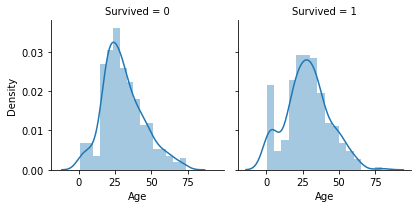

In [ ]:
# Influência da idade na probabilidade de sobrevivência
age_survived = sn.FacetGrid(df_train, col='Survived')
age_survived.map(sn.distplot, 'Age')

##### Diantas das análises pudemos concluir:

- Enquanto aprox. 80% das mulheres sobreviveram, 20% dos sobreviventes foram homens
- Passageiros da 1ª Classe tem mais que o dobro de chance de escaparem do desastre que passageiros da 3ª Classe
- Houve um pico de sobreviventes ao lado dos sobreviventes, de criaças pequenas 

##### Em suma:
- Mulheres sobrevivem mais
- Crianças pequenas sobrevivem mais
- Passageiros da 1ª Classe sobrevivem mais 

## Preparação dos dados 
* Limpeza
* Tratamento
* Transformação

##### 1º Passo - Juntar datasets de treino e teste, para posteriormente, separar no final por conta de dummy e variáveis codificadas, os dados de treino e teste devem ter a mesma arquitetura

In [ ]:
# 1. Salvar os índices dos datasets para recuperação posterior
train_indice = df_train.shape[0]
teste_indice = df_test.shape[0]

# 2. Salvar PassengerId para envio ao Kaggle
passengerId = df_test['PassengerId']

# 3. Extrair coluna 'Survived' e excluir
survived_column = df_train.Survived.copy() #criando uma cópia da coluna
df_train.drop(['Survived'], axis=1, inplace=True)

# 4. Concatenar treino e teste em um único Dataframe
df_merged = pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)
df_merged

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 5. Dropando colunas irrelevantes para o modelo
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Importante Etapa - Substituição de valores faltantes

In [ ]:
# 1. Entendendo quais valores são nulos
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [ ]:
# 2. Substituindo valores pela mediana

# Age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# Fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# Embarked
df_merged['Embarked'].fillna('S', inplace=True) #substituindo pelo 'valor' pela moda

In [ ]:
# Encontrando valor com maior incidência (moda) na coluna 'Embarked'  
df_merged['Embarked'].describe()

group_embarked = df_merged.groupby(['Embarked']).size()
group_embarked

Embarked
C    270
Q    123
S    916
dtype: int64

### Preparando variáveis para o modelo
- Modelo matemático exige que trabalhemos com variáveis numéricas, então, converteremos nossas variáveis categóricas para números

In [ ]:
# 1. Converter 'Sex' para 0 e 1. (male = 0, female = 1)
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# 2. Convertendo variáveis de 'Embarked' por dummie
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked') #criando novas colunas com dummies
df_merged = pd.concat([df_merged, embarked_dummies], axis=1) #concatenando novas colunas ao Dataframe
df_merged.drop('Embarked', axis=1, inplace=True) #dropando coluna Embarked com variáveis categóricas

df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


### Recuperando os datasets de treino e teste

#### O motivo da união dos datasets é para diminuir o risco de erro no tratamento dos dados


In [ ]:
df_train = df_merged.iloc[:train_indice]
df_test = df_merged.iloc[train_indice:]

# Construção dos Modelos de Previsão

In [ ]:
# 1. Importação libs para construção do modelo de Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

- Modelo com Regressão Logística

In [22]:
# 2. Criando modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(df_train, survived_column)

# 3. Verificando acurácia do modelo
acc_lrModel = round(lr_model.score(df_train, survived_column) * 100, 2)

Acurácia do modelo de Regressão Logística: <b>80.13</b>

- Modelo com Árvore de Decisão

In [122]:
# 2. Criando modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(df_train, survived_column)

# 3. Verificiando acurácia do modelo
acc_treeModel = round(tree_model.score(df_train, survived_column) * 100, 2)

Acurácia do modelo com Árvore de Decisão: <b>97.98</b>

## - Criando previsões com os modelos criados
## - Gerando arquivos de submissão para o Kaggle 


In [128]:
# 1. Modelo de previsão com Regressão Logística
lr_predict = lr_model.predict(df_test)

# 2. Criando df para realizar submissão no Kaggle
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': lr_predict})

# 3. Gerando arquivo csv
submission.to_csv('./submission_lr_BrunoMendes.csv', index=False)

In [129]:
# 1. Modelo de previsão com Árvore de Decisão
tree_predict = tree_model.predict(df_test)

# 2. Criando df para realizar submissão no Kaggle
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': tree_predict})

# 3. Gerando arquivo csv
submission.to_csv('./submission_tree_BrunoMendes.csv', index=False)